In [1]:
#过采样-->训练模型
# !pip install imbalanced-learn==0.9.1
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
# 获取数据
trainData=pd.read_csv("./train.csv")
# 特征工程
target=trainData['target']
min_max_scaler =preprocessing.MinMaxScaler()
numData=min_max_scaler.fit_transform(trainData[trainData.columns[21:59]])
catData=trainData[trainData.columns[1:21]]
df_num=pd.DataFrame(numData,columns=['num_'+str(i) for i in range(38)])
feature=pd.concat([catData,df_num],axis=1)

In [3]:
def sample_balance(X, y):
    '''
    使用SMOTE方法对不均衡样本做过抽样处理
    :param X: 输入特征变量X
    :param y: 目标变量y
    :return: 均衡后的X和y
    '''
    model_smote = SMOTE()  # 建立SMOTE模型对象
    x_smote_resampled, y_smote_resampled = model_smote.fit_resample(X, y)  # 输入数据并作过抽样处理
    return x_smote_resampled, y_smote_resampled
feature, target = sample_balance(feature, target)

In [4]:
# 分割数据集
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=12)
model=DecisionTreeClassifier(max_depth = 10)
model.fit(X_train,y_train)

# 训练，评估
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)
print(auc)
#模型准确度
print('模型准确度',model.score(X_test,y_test))

0.9413721085452512
模型准确度 0.8815271091968584


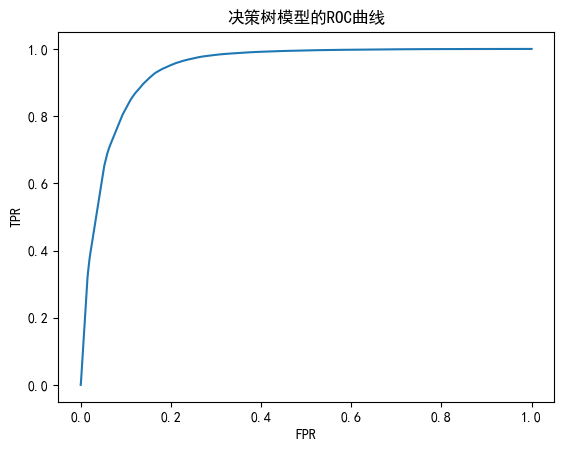

In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from pylab import mpl

# 画roc曲线
fpr,tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(fpr,tpr,label='ROC')
plt.title('决策树模型的ROC曲线')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

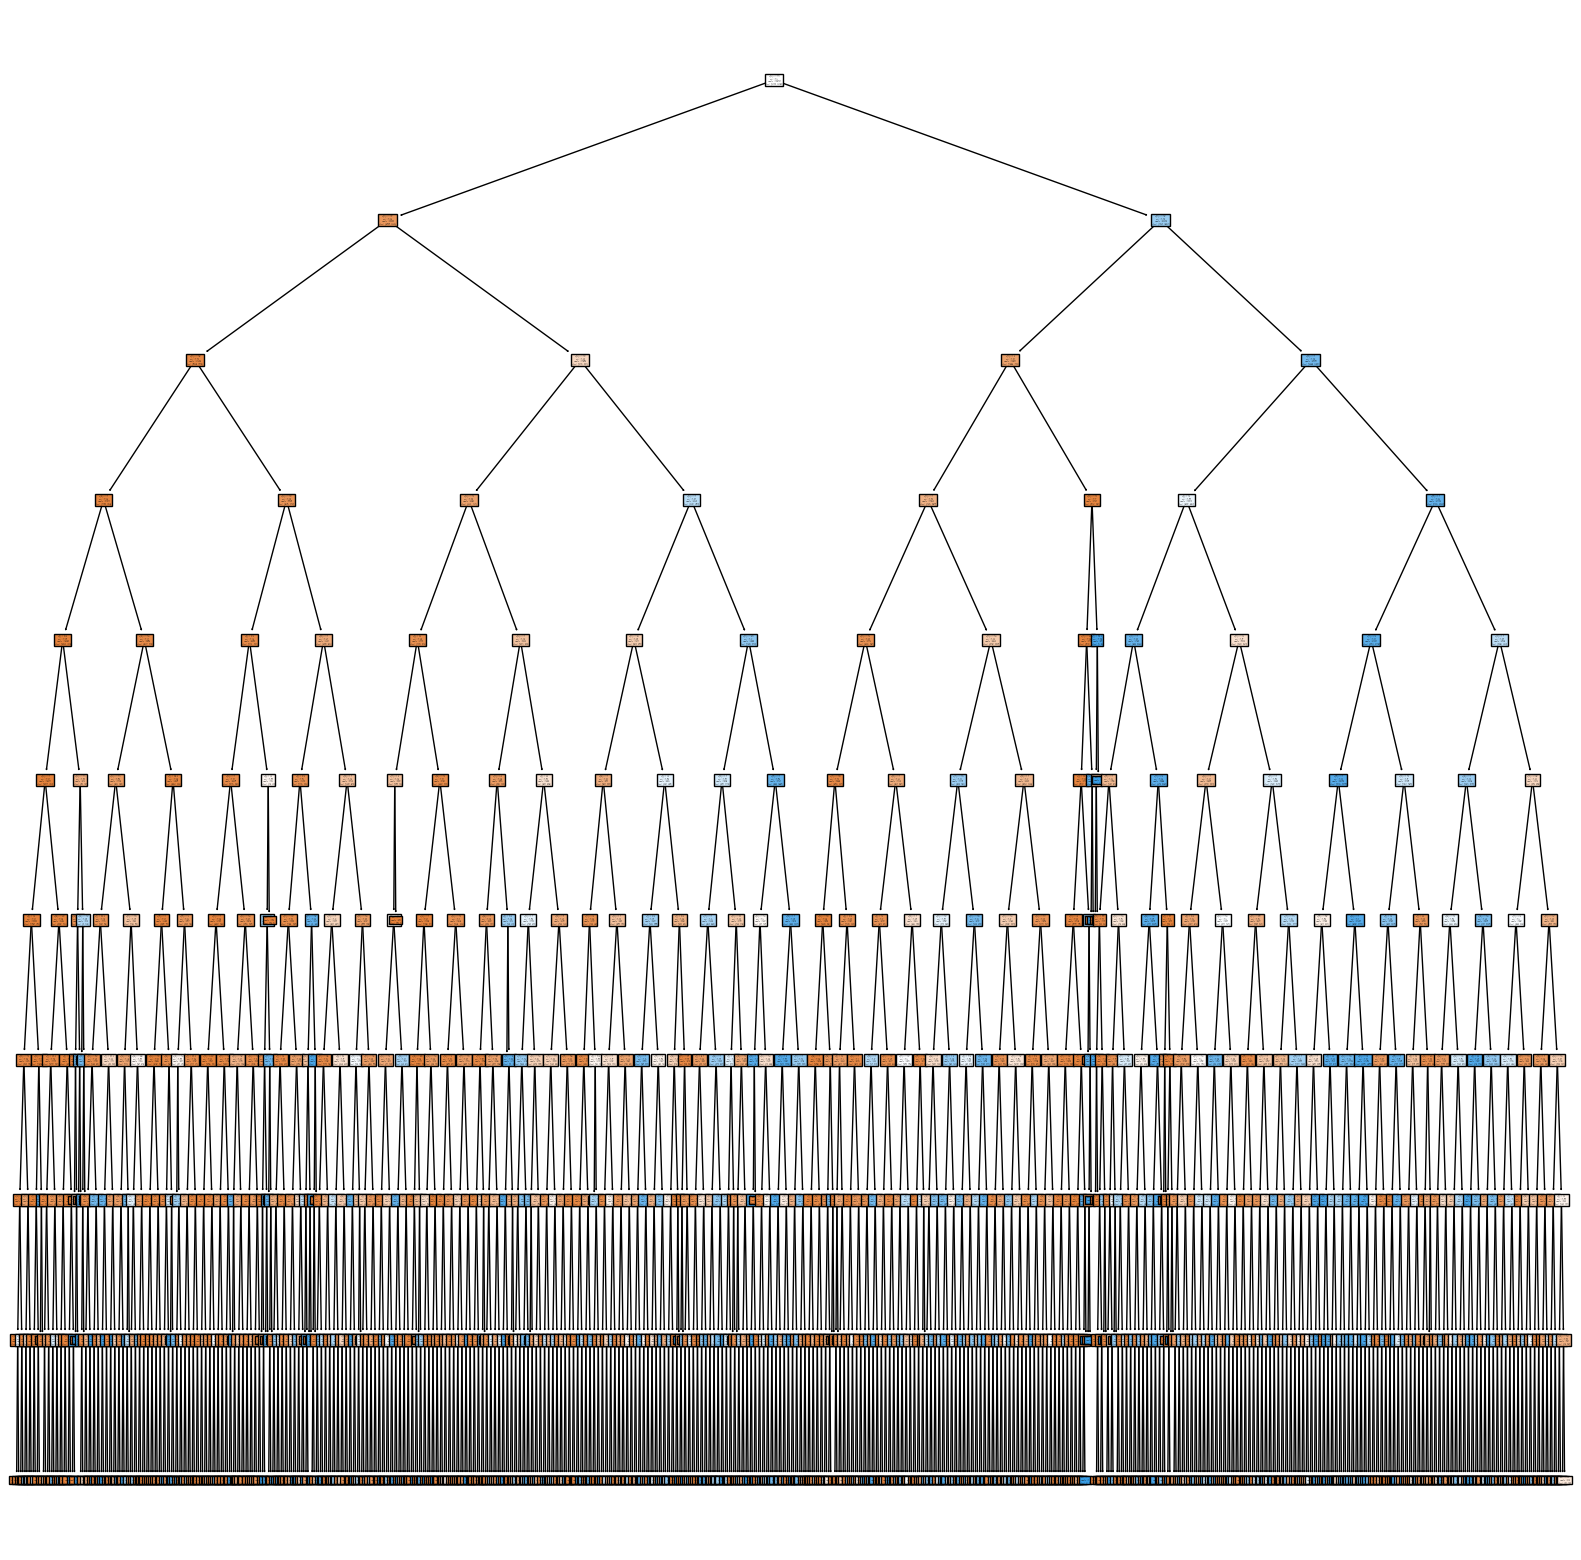

<Figure size 640x480 with 0 Axes>

In [6]:
#画树
plt.figure(figsize=(20,20))
plot_tree(model,filled=True)
plt.show()
plt.savefig('tree_visualization.png')